In [3]:
import pandas as pd
import numpy as np
import requests
import wikipedia as wp
import pycountry
import datetime
import time
import re
import networkx as nx
from IPython.display import display, Image
from IPython.display import HTML

import matplotlib.pyplot as plt
%matplotlib inline

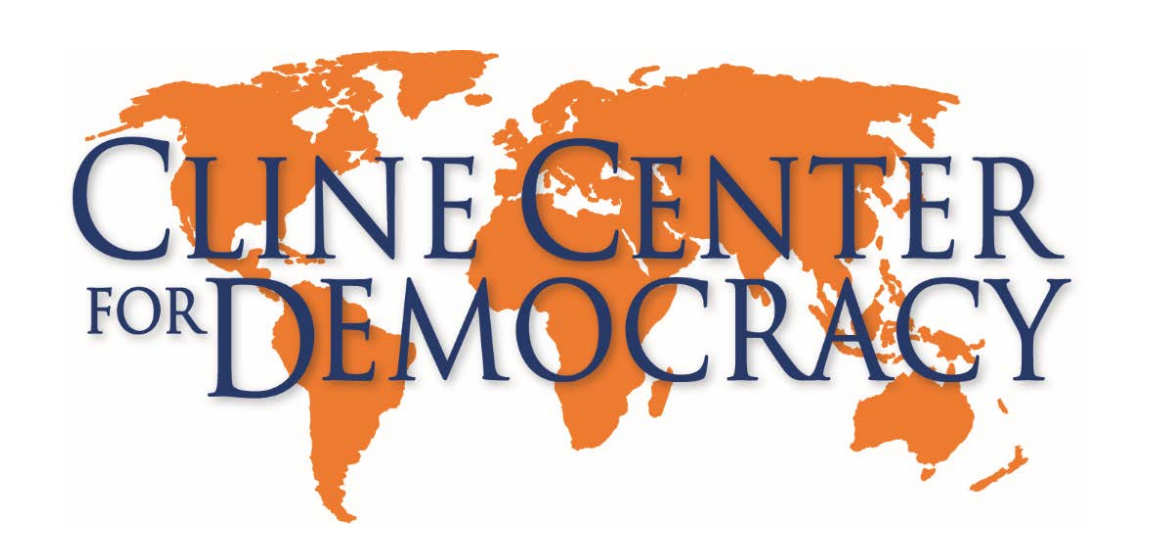

In [5]:
Image(filename='Capture5.png')

Phoenix is a new event data set pro duced by researchers at Caerus Asso ciates, Penn State University,
Parus Analytics, and the University of Texas–Dallas. It provides freely available data on international and subnational p olitical events, generated daily using op en-source, customizable software. The com munity around the dataset is organized as the Op en Event Data Alliance.

# freely available data on political events

# what is an event?

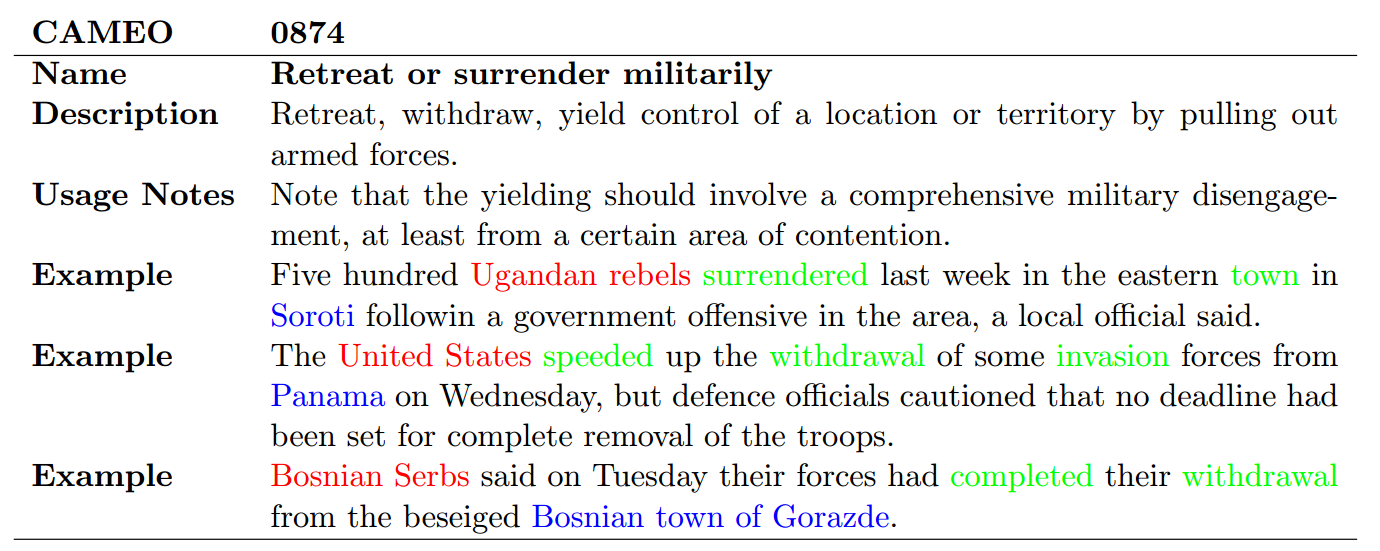

In [6]:
Image(filename='capture7.png') 

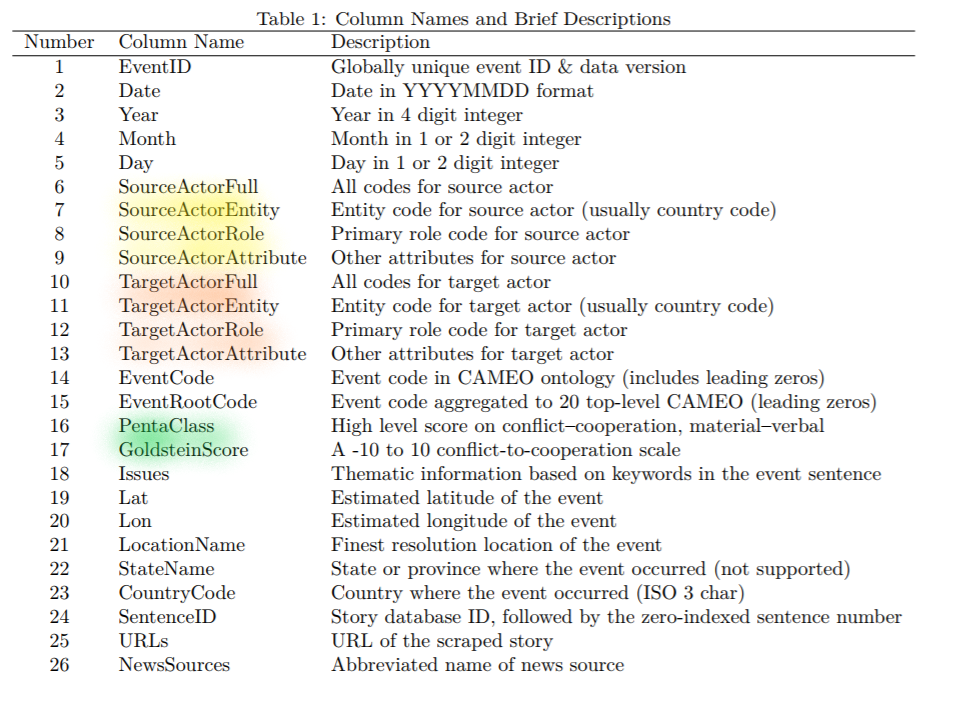

In [7]:
Image(filename='Capture2.png')

# How is it created?

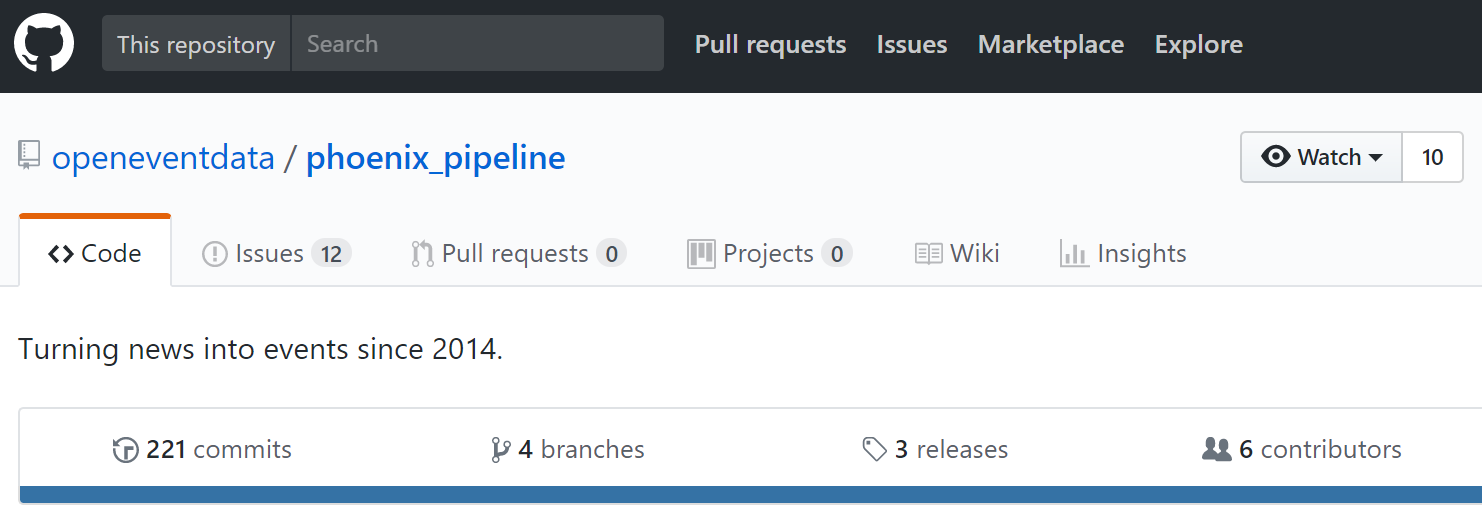

In [8]:
Image(filename='Capture8.png')

In [9]:
HTML('<img src="cline.gif">')

# Where is this data?

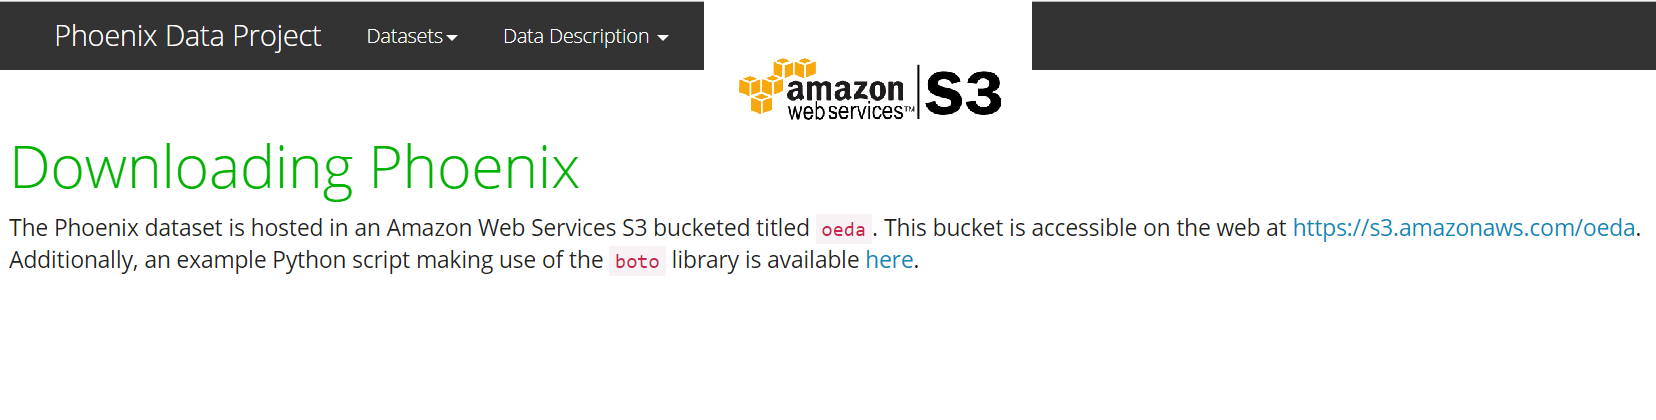

In [10]:
Image(filename='Capture6.png')

# How does this data look like?
# How can I get this data?

# How can I make sense of it?

# What is the World's GoldStein Score?

# How are some countries acting on each other over time?

The dataset from 1979 to 2015 is a csv file I will call it 'old'. The data from 2015 to 2017 is not readily available and must be downdloaded using a script. I will call it 'new'. We will merge the new into the old one to get a dataset from <b>1979 to 2015.

In [11]:
old = pd.read_csv("C:/Users/Cagdas/Documents/GDELT/PhoenixSWB_1979-2015.csv", encoding='utf-8')

In [12]:
old.head()

,eid,story_date,year,month,day,source,source_root,source_agent,source_others,target,...,quad_class,goldstein,joined_issues,lat,lon,placename,statename,countryname,aid,process
0,SWB2668393,NaN,NaN,NaN,NaN,USAGOV,USA,GOV,NaN,USRUKR,...,0,0.0,NaN,49.00000,32.0000,Ukraine,NaN,UKR,113261648,SWBpre01012007_V1
1,SWB2052346,NaN,NaN,NaN,NaN,UKRELI,UKR,NaN,ELI,RUS,...,1,1.0,NaN,47.00556,28.8575,ChiÅinÄu,Municipiul ChiÅinÄu,MDA,113261648,SWBpre01012007_V1
2,SWB2044247,NaN,NaN,NaN,NaN,USRUKR,NaN,NaN,UKR,RUS,...,1,1.0,NaN,47.00556,28.8575,ChiÅinÄu,Municipiul ChiÅinÄu,MDA,113261648,SWBpre01012007_V1
3,SWB2740432,10/11/2009,2009.0,10.0,11.0,---MED,NaN,MED,NaN,---SPY,...,1,1.0,NaN,39.76000,-98.5000,United States,NaN,USA,113261656,SWBpre01012007_V1
4,SWB0258012,NaN,NaN,NaN,NaN,AFGPPL,AFG,NaN,PPL,---PPL,...,1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,113261658,SWBpre01012007_V1


what are the news sources?

In [14]:
old.groupby(['process']).eid.count().reset_index()

,process,eid
0,SWB_01012007-12312010_V1,785654
1,SWBpost12312010_V2,502394
2,SWBpre01012007_V1,1618667


these 3 news sources are BBC (explained in the pdf)

In [15]:
old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906715 entries, 0 to 2906714
Data columns (total 25 columns):
eid              object
story_date       object
year             float64
month            float64
day              float64
source           object
source_root      object
source_agent     object
source_others    object
target           object
target_root      object
target_agent     object
target_others    object
code             int64
root_code        int64
quad_class       int64
goldstein        float64
joined_issues    object
lat              float64
lon              float64
placename        object
statename        object
countryname      object
aid              int64
process          object
dtypes: float64(6), int64(4), object(15)
memory usage: 554.4+ MB


# How to find the events after 2015.06.2016?

Lets write a downloader script which will bring data from their Amazon S3 bucket

In [98]:
#This is how the downloading script looks like. I am commenting out not to start downloading again.

# steps:
# determine which time period you are interested in like [June-1-2016 to June-5-2016]
# make a list of dates
# download all zip files using the list of dates
# unzip them to a file
# loop unzipped text files to make them pandas data frames
# give column names to all those dataframes
# concat them all into one dataframe 
########################################################################################

# determine which time period you are interested in like [June-1-2016 to June-5-2016]
# make a list of dates
import datetime
import pandas as pd

start = datetime.datetime.strptime("20160601", "%Y%m%d")
end = datetime.datetime.strptime("20160605", "%Y%m%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

mydates = []
for date in date_generated:
    mydates.append(date.strftime("%Y%m%d"))

# download all zip files using the list of dates. It will work only if you have a directory called phoenixData in your Documents folder
#import requests
#import os
#base_url = 'https://s3.amazonaws.com/oeda/data/current/events.full.'
#ext = '.txt.zip'
#default_path = 'C:/Users/user/Documents/phoenixData'
#os.chdir(default_path)

#for i in mydates:
#    r = requests.get(base_url + i + ext)
#    with open("phoenix"+i+".zip", "wb") as code:
#        code.write(r.content)
        
# unzip them

import zipfile,fnmatch,os

rootPath = r"C:\Users\user\Documents\phoenixData"
pattern = '*.zip'
#for root, dirs, files in os.walk(rootPath):
#    for filename in fnmatch.filter(files, pattern):
#        try:
            
#            print(os.path.join(root, filename))
#            zipfile.ZipFile(os.path.join(root, filename)).extractall(os.path.join(root, os.path.splitext(filename)[0]))
            
#        except:
            
#            print("EmptyZipFile_NoDataForThatDay")


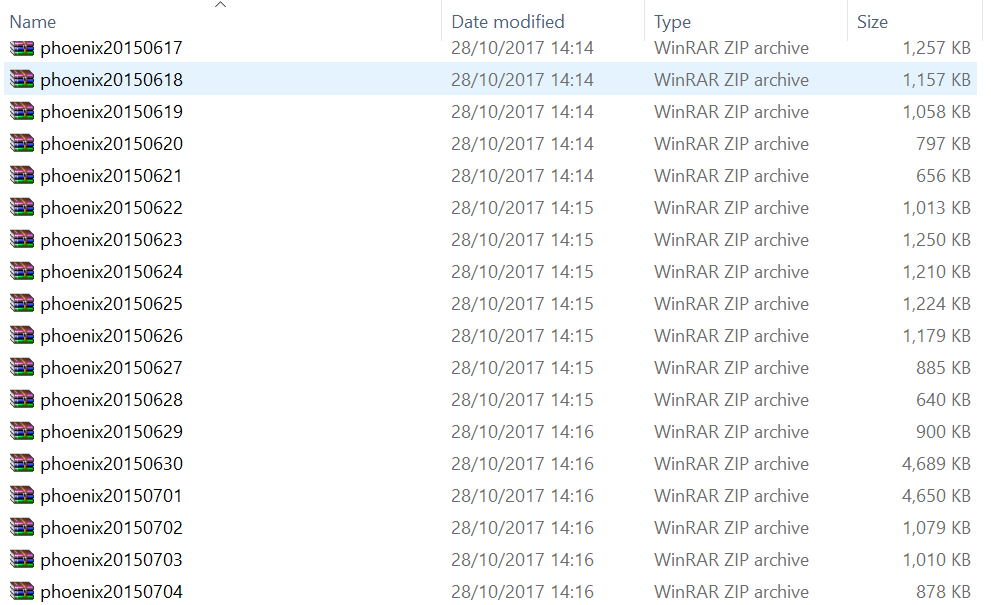

In [17]:
Image(filename='Capture9.png')

Now they are in a directory in my computer as text files. We will concat those txt files into 1 dataframe. We will filter the newssources to use only BBC

In [89]:
start = datetime.datetime.strptime("20150616", "%Y%m%d")
end = datetime.datetime.strptime("20171019", "%Y%m%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

mydates = [date.strftime("%Y%m%d") for date in date_generated]

# loop unzipped text files to make them pandas data frames

path = r"C:/Users/Cagdas/Documents/GDELT/phoenix"
paths = [(path + '/' + 'phoenix' + mydates[i] + '/') for i in range(len(mydates))]   

#Now we have all the paths needed. We need to create a dataframe for each of these paths.

allFrames = []
for i in range(len(paths)):
    try:
        df = pd.read_table((paths[i]+'events.full.'+mydates[i]+'.txt'))
        allFrames.append(df)
    except:
        pass
        #print("NoDataThere for" + mydates[i])

# give column names to all those dataframes because they dont have any.
    
for i in range(len(allFrames)):
    allFrames[i].columns = ['EventID', 
                            'Date',
                            'Year',
                            'Month',
                            'Day',
                            'SourceActorFull',
                            'SourceActorEntity',
                            'SourceActorRole',
                            'SourceActorAttribute',
                            'TargetActorFull',
                            'TargetActorEntity',
                            'TargetActorRole',
                            'TargetActorAttribute',
                            'EventCode',
                            'EventRootCode',
                            'PentaClass',
                            'GoldsteinScore',
                            'Issues',
                            'Lat',
                            'Lon',
                            'LocationName',
                            'StateName',
                            'CountryCode',
                            'SentenceID',
                            'URLs',
                            'NewsSources']


# concat them all into one dataframe. It looks like we dont have much data July 2017 onwards.
dfConcat = pd.concat(allFrames)

In [21]:
# get some info about the concat.dataframe
dfConcat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992878 entries, 0 to 390
Data columns (total 26 columns):
EventID                 object
Date                    int64
Year                    int64
Month                   int64
Day                     int64
SourceActorFull         object
SourceActorEntity       object
SourceActorRole         object
SourceActorAttribute    object
TargetActorFull         object
TargetActorEntity       object
TargetActorRole         object
TargetActorAttribute    object
EventCode               object
EventRootCode           object
PentaClass              float64
GoldsteinScore          float64
Issues                  object
Lat                     float64
Lon                     float64
LocationName            object
StateName               object
CountryCode             object
SentenceID              object
URLs                    object
NewsSources             object
dtypes: float64(4), int64(4), object(18)
memory usage: 410.5+ MB


In [19]:
dfConcat.head()

,EventID,Date,Year,Month,Day,SourceActorFull,SourceActorEntity,SourceActorRole,SourceActorAttribute,TargetActorFull,...,GoldsteinScore,Issues,Lat,Lon,LocationName,StateName,CountryCode,SentenceID,URLs,NewsSources
0,1129437_v0.2.0,20150616,2015,6,16,BIH,BIH,NaN,NaN,ISR,...,1.0,NaN,43.84864,18.35644,Sarajevo,Federation of Bosnia and Herzegovina,BIH,557f711d421aa94ef6ced057_5,http://article.wn.com/view/2015/06/16/Internat...,wn_africa
1,1129438_v0.2.0,20150616,2015,6,16,ISRGOV,ISR,GOV,NaN,IRN,...,0.0,NaN,35.69439,51.42151,Tehrān,Ostān-e Tehrān,IRN,55806fe4421aa94f026a70d7_0,http://article.wn.com/view/2015/06/16/Israel_s...,wn_world
2,1129439_v0.2.0,20150615,2015,6,15,FRABUS,FRA,BUS,NaN,SAU,...,0.0,NaN,23.75000,54.50000,United Arab Emirates,NaN,ARE,557e797e421aa979198945ea_1,http://www.zawya.com/story/Mideast_oil_powers_...,zawya
3,1129440_v0.2.0,20150616,2015,6,16,AUT,AUT,NaN,NaN,GRCGOV,...,0.0,"EUROPEAN_UNION,1",37.97945,23.71622,Athens,NaN,GRC,557ffb68421aa94eecd32f22_0,http://www.thestar.com.my/News/World/2015/06/1...,malstar_world
4,1129441_v0.2.0,20150616,2015,6,16,USA,USA,NaN,NaN,DEUGOV,...,5.2,NaN,31.80238,-97.09167,West,NaN,USA,5580616f421aa94f18f204c1_2;557fe56a421aa94f564...,http://article.wn.com/view/2015/06/16/Accredit...,wn_africa;wn_asia


In [20]:
min(dfConcat['Date']), max(dfConcat['Date'])

(20010101, 20170616)

# Can we merge the old and new dataframes?

we have 2015 06 16 onwards now. we need to merge this with the database.
first lets bring the database here and compare if the columns are matching

the database column are the same only the names are different. in the database there is only 1 column which is not present in the new file. it is the URL column. We can change the column names and merge these 2 databases together to have a time series from 1979 to 2017


In [21]:
old['NewsSources'] = 'bbc' #csv is given as BBC Summary of World Broadcasts (1979-2015) on website

In [22]:
old.columns =               ['EventID', 
                            'Date',
                            'Year',
                            'Month',
                            'Day',
                            'SourceActorFull',
                            'SourceActorEntity',
                            'SourceActorRole',
                            'SourceActorAttribute',
                            'TargetActorFull',
                            'TargetActorEntity',
                            'TargetActorRole',
                            'TargetActorAttribute',
                            'EventCode',
                            'EventRootCode',
                            'PentaClass',
                            'GoldsteinScore',
                            'Issues',
                            'Lat',
                            'Lon',
                            'LocationName',
                            'StateName',
                            'CountryCode',
                            'SentenceID',
                            'URLs',
                            'NewsSources']

In [23]:
old.columns

Index(['EventID', 'Date', 'Year', 'Month', 'Day', 'SourceActorFull',
       'SourceActorEntity', 'SourceActorRole', 'SourceActorAttribute',
       'TargetActorFull', 'TargetActorEntity', 'TargetActorRole',
       'TargetActorAttribute', 'EventCode', 'EventRootCode', 'PentaClass',
       'GoldsteinScore', 'Issues', 'Lat', 'Lon', 'LocationName', 'StateName',
       'CountryCode', 'SentenceID', 'URLs', 'NewsSources'],
      dtype='object')

In [24]:
dfConcat.columns

Index(['EventID', 'Date', 'Year', 'Month', 'Day', 'SourceActorFull',
       'SourceActorEntity', 'SourceActorRole', 'SourceActorAttribute',
       'TargetActorFull', 'TargetActorEntity', 'TargetActorRole',
       'TargetActorAttribute', 'EventCode', 'EventRootCode', 'PentaClass',
       'GoldsteinScore', 'Issues', 'Lat', 'Lon', 'LocationName', 'StateName',
       'CountryCode', 'SentenceID', 'URLs', 'NewsSources'],
      dtype='object')

now we have 2 dataframes with the same column names. we can merge them. however, before merging, 1) we should change the date columns to datetime format 2) In the newdataframe which is dfConcat, we need to drop the news sources other than BBC

In [25]:
dfConcat['Date'] = pd.to_datetime(dfConcat['Date'], format='%Y%m%d')

In [26]:
old.Date= pd.to_datetime(old.Date,format="%m/%d/%Y")

We have tons of different news sources. These are listed here:

https://github.com/openeventdata/scraper/blob/master/whitelist_urls.csv 

How will we know which ones are BBC?

Which of these contain the string 'BBC' ?

In [27]:
dfConcat[dfConcat['NewsSources'].str.contains('bbc')].count()

EventID                 18980
Date                    18980
Year                    18980
Month                   18980
Day                     18980
SourceActorFull         18980
SourceActorEntity       18066
SourceActorRole          7574
SourceActorAttribute     3985
TargetActorFull         18980
TargetActorEntity       17720
TargetActorRole          4875
TargetActorAttribute     3172
EventCode               18980
EventRootCode           18980
PentaClass              18934
GoldsteinScore          18934
Issues                   4784
Lat                     12329
Lon                     12329
LocationName            12329
StateName                3956
CountryCode             12329
SentenceID              18980
URLs                    18980
NewsSources             18980
dtype: int64

Now I got 18980 records which contain BBC. I will drop the records not containing BBC

In [99]:
new = dfConcat[dfConcat.NewsSources.str.contains('bbc') == True]

Great now I have only BBC records. Lets combine the old and the new dataframes to have a time series from 1970s to 2017

In [29]:
data = old.append(new).reset_index()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925695 entries, 0 to 2925694
Data columns (total 27 columns):
index                   int64
EventID                 object
Date                    datetime64[ns]
Year                    float64
Month                   float64
Day                     float64
SourceActorFull         object
SourceActorEntity       object
SourceActorRole         object
SourceActorAttribute    object
TargetActorFull         object
TargetActorEntity       object
TargetActorRole         object
TargetActorAttribute    object
EventCode               object
EventRootCode           object
PentaClass              float64
GoldsteinScore          float64
Issues                  object
Lat                     float64
Lon                     float64
LocationName            object
StateName               object
CountryCode             object
SentenceID              object
URLs                    object
NewsSources             object
dtypes: datetime64[ns](1), float64(7

In [31]:
# this is to prove that the records have been concatanated. just a sanity check
2925695 - 2906715

18980

In [33]:
4899593 - 2906715

1992878

# Can we learn about countries by using Goldstein Score?

In [100]:
#Lets check one country... Turkey
TURsource = data[data['SourceActorEntity'] == 'TUR']
USAsource = data[data['SourceActorEntity'] == 'USA']

C:\Users\Cagdas\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:4011: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


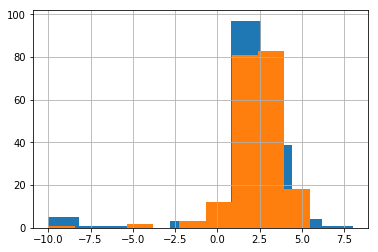

In [102]:
#When Turkey and USA are targeting the other countries in our data. They dont look much different
TURsource.groupby(['TargetActorEntity']).GoldsteinScore.apply(np.median).hist()
USAsource.groupby(['TargetActorEntity']).GoldsteinScore.apply(np.median).hist();

In [36]:
TUR_masked = TURsource[TURsource['Date'] > '2012']

In [37]:
TUR_GS_years = TUR_masked.groupby([TUR_masked.Date.dt.year]).agg({"GoldsteinScore": [min, max, np.mean, np.std]}).reset_index()
TUR_GS_years.head()

Date GoldsteinScore                          
                   min   max      mean       std
0  2012          -10.0   9.0  0.154448  4.290585
1  2013          -10.0  10.0  0.681257  4.045789
2  2014          -10.0   9.0  0.517929  4.222502
3  2015          -10.0   8.5  0.470337  4.305094
4  2016          -10.0   9.0 -0.517226  4.624238

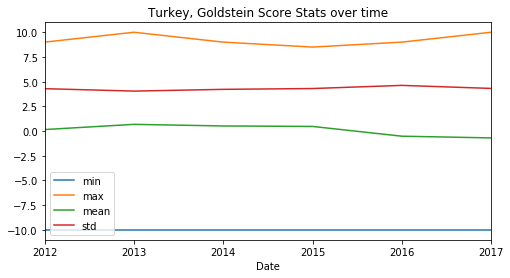

In [38]:
TUR_GS_years.plot(kind='line',x='Date',y='GoldsteinScore',figsize=(8,4))
plt.title("Turkey, Goldstein Score Stats over time");

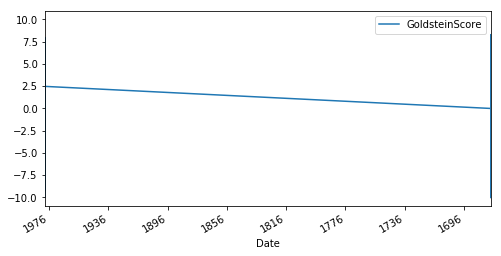

In [39]:
TURsource.plot(kind='line',x='Date',y='GoldsteinScore',figsize=(8,4))

As we can see we need to filter the dates greater than 1979. Otherwise we are falling into wrongly registered data. However, we will coninue with the data after 1990.

In [40]:
data = data[data['Date'] > '1990']

# Goldstein Score of the entire world

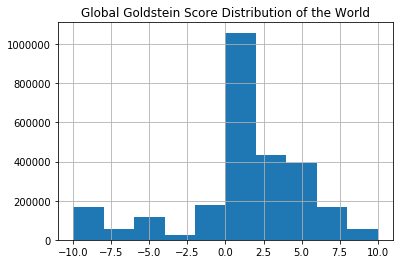

In [41]:
data.GoldsteinScore.apply(np.mean).hist()
plt.title("Global Goldstein Score Distribution of the World");

In [42]:
daily_event_count = data.groupby(['Date']).EventID.count().reset_index()
daily_event_count.head()

,Date,EventID
0,1990-01-02,36
1,1990-01-03,42
2,1990-01-04,74
3,1990-01-05,46
4,1990-01-06,49


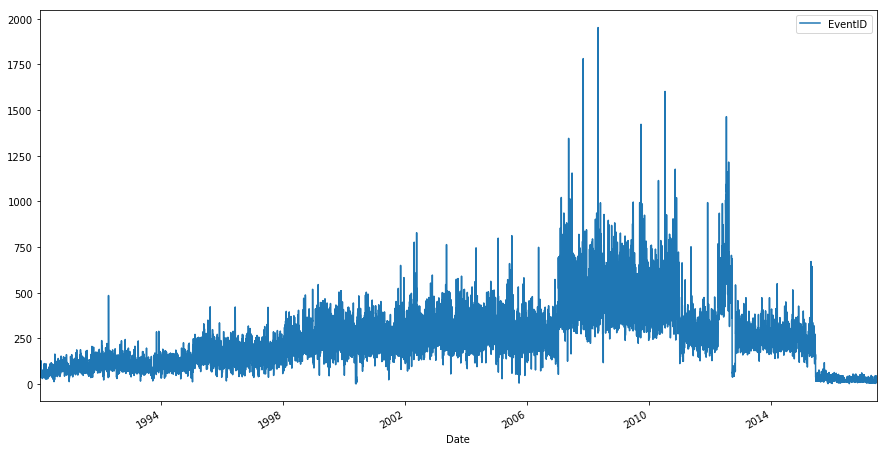

In [43]:
daily_event_count.plot(kind='line',x='Date',y='EventID',figsize=(15,8))
#count of events over time in our data from bbc

In [44]:
max(data['Date']), min(data['Date'])

(Timestamp('2017-06-16 00:00:00'), Timestamp('1990-01-02 00:00:00'))

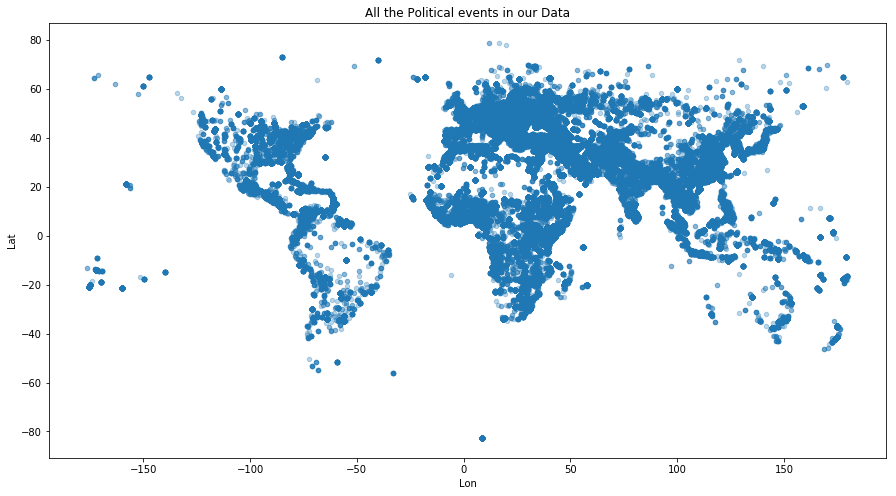

In [45]:
data.plot(kind='scatter',x='Lon',y='Lat',figsize=(15,8), alpha=0.3)
plt.title("All the Political events in our Data");

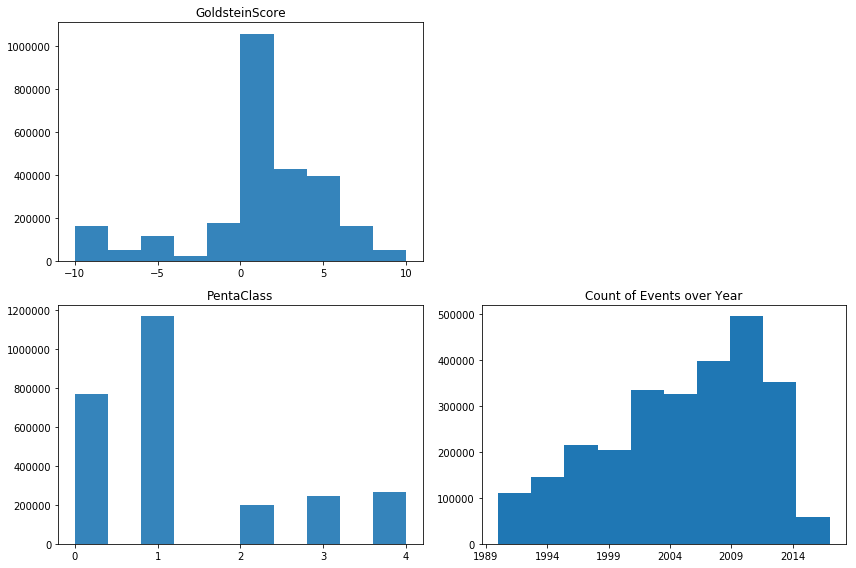

In [46]:
#Have a look at the 3 variables in the data

fig = plt.figure(figsize=(12, 8))

sub1 = plt.subplot(2, 2, 1)
sub1.set_xticks(range(-10,11,5))
sub1.set_yticks(range(0,1300000,200000))
sub1.hist(data['GoldsteinScore'].dropna(), alpha=0.9)
sub1.set_title('GoldsteinScore')

sub2 = plt.subplot(2, 2, 3)
sub2.set_xticks(range(0,5,1))
sub2.set_yticks(range(0,1300000,200000))
sub2.hist(data['PentaClass'].dropna(), alpha=0.9)
sub2.set_title('PentaClass')

sub3 = plt.subplot(2, 2, 4)
sub3.set_xticks(range(1979,2018,5))
sub3.set_yticks(range(0,1400000,100000))
sub3.hist(data['Year'])
sub3.set_title('Count of Events over Year')

fig.tight_layout()
plt.show();

how many events per year: Until 2000s there were avg 150 000 events recorded per year. After 2000 it triples. Effect of digitalization and World Wide Web?

In [47]:
data.groupby(['NewsSources']).EventID.count().reset_index().head()

,NewsSources,EventID
0,aljazeera;bbc,2
1,aljazeera;guardian_china;google;guardian_ameri...,1
2,aljazeera;sfgate_world;google;dawn_pk;bbc,4
3,aljazeera;voa_all;wn_mideast;wn_world;bbc,1
4,aljazeera;wn_asia;google;wn_asia;euronews;chin...,1


how is the average Goldstein score is changing over time between Turkey and the US: Turkey as the source actor and US as the target

# USA-Turkey and RUS-Turkey relations

C:\Users\Cagdas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


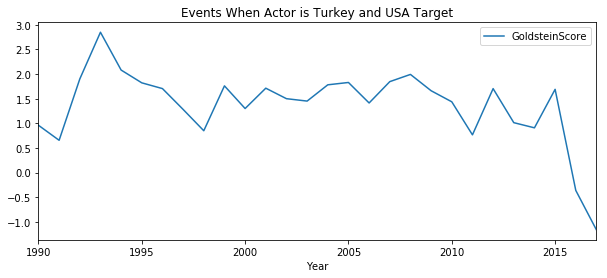

In [49]:
#1. Turkey data is TURsource
TURsource = data[data['SourceActorEntity'] == 'TUR']

#2. Further filtering needed for the events which are only related to the US
TURsourceUSAtarget = TURsource[TURsource['TargetActorEntity'] == 'USA']

#3. We need a year column
TURsourceUSAtarget['Year'] = pd.DatetimeIndex(TURsourceUSAtarget['Date']).year

#3. Mean Goldtein score per year

TURsourceUSAtargetMeanGSperYear = TURsourceUSAtarget.groupby(['Year']).agg({'GoldsteinScore':'mean'}).reset_index()

#4. plot it
TURsourceUSAtargetMeanGSperYear.plot(kind='line',x='Year',y='GoldsteinScore',figsize=(10,4))
plt.title('Events When Actor is Turkey and USA Target');

C:\Users\Cagdas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Cagdas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


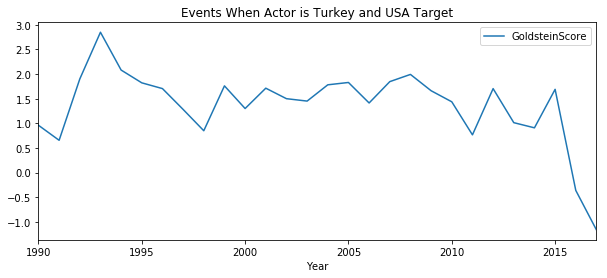

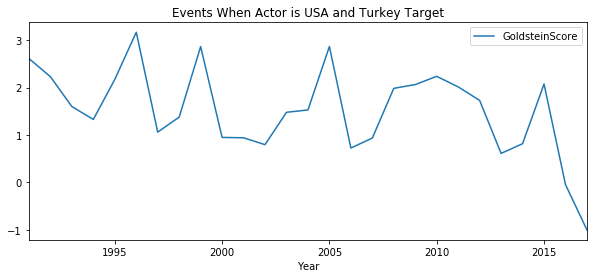

In [50]:
# Establish a comparison between 2 countries. How they were acting to each other?

#1. Turkey data is TURsource, prepared already above. We do the same for the US
USAsource = data[data['SourceActorEntity'] == 'USA']

#2. Further filtering needed for the events which are only related to the US

TURsourceUSAtarget = TURsource[TURsource['TargetActorEntity'] == 'USA']
USAsourceTURtarget = USAsource[USAsource['TargetActorEntity'] == 'TUR']

#3. We need a year column
TURsourceUSAtarget['Year'] = pd.DatetimeIndex(TURsourceUSAtarget['Date']).year
USAsourceTURtarget['Year'] = pd.DatetimeIndex(USAsourceTURtarget['Date']).year

#3. Mean Goldtein score per year

TURsourceUSAtargetMeanGSperYear = TURsourceUSAtarget.groupby(['Year']).agg({'GoldsteinScore':'mean'}).reset_index()
USAsourceTURtargetMeanGSperYear = USAsourceTURtarget.groupby(['Year']).agg({'GoldsteinScore':'mean'}).reset_index()

#4. plot it
TURsourceUSAtargetMeanGSperYear.plot(kind='line',x='Year',y='GoldsteinScore',figsize=(10,4))
plt.title('Events When Actor is Turkey and USA Target')
USAsourceTURtargetMeanGSperYear.plot(kind='line',x='Year',y='GoldsteinScore',figsize=(10,4))
plt.title('Events When Actor is USA and Turkey Target')

# Russian Fighter Jet Event

C:\Users\Cagdas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


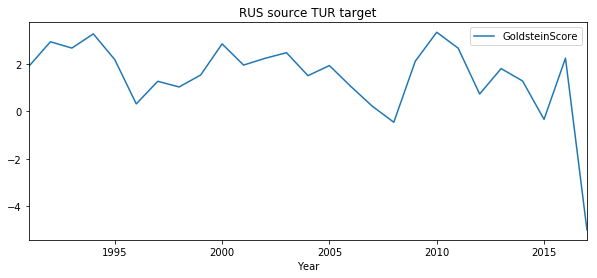

In [51]:
RUSsource = data[data['SourceActorEntity'] == 'RUS']

#2. Further filtering needed for the events which are only related to the US
#TURsourceRUStarget = TURsource[TURsource['TargetActorEntity'] == 'RUS']
RUSsourceTURtarget = RUSsource[RUSsource['TargetActorEntity'] == 'TUR']

#3. We need a year column
#TURsourceRUStarget['Year'] = pd.DatetimeIndex(TURsourceRUStarget['Date']).year
RUSsourceTURtarget['Year'] = pd.DatetimeIndex(RUSsourceTURtarget['Date']).year

#3. Mean Goldtein score per year

#TURsourceRUStargetMeanGSperYear = TURsourceRUStarget.groupby(['Year']).agg({'GoldsteinScore':'mean'}).reset_index()
RUSsourceTURtargetMeanGSperYear = RUSsourceTURtarget.groupby(['Year']).agg({'GoldsteinScore':'mean'}).reset_index()

#4. plot it
#TURsourceRUStargetMeanGSperYear.plot(kind='line',x='Year',y='GoldsteinScore',figsize=(10,4))
#plt.title('TUR source RUS target')
RUSsourceTURtargetMeanGSperYear.plot(kind='line',x='Year',y='GoldsteinScore',figsize=(10,4))
plt.title('RUS source TUR target');

Regular trend of Russia had a distruption after 2015. It turns out Turkey shot down a Russian fighter jet on Syrian border. Its effect is visible here in this plot

# Before and After 9/11

In [52]:
#take a subset time period : 1995 - 2000 USA AFG. 2000 - 2005 USA AFG. Plot the same like above

C:\Users\Cagdas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Cagdas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


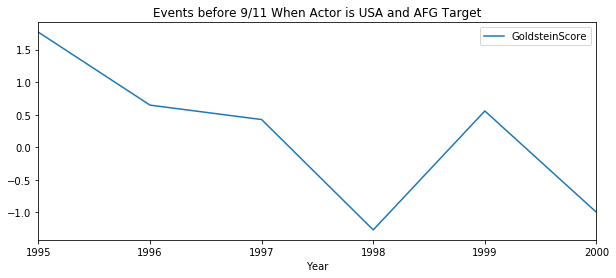

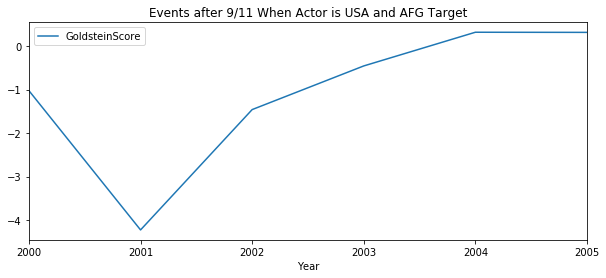

In [53]:
before9_11 = data[(data['Date']>datetime.date(1995,1,1)) & (data['Date']<datetime.date(2000,3,1))] 
after9_11 = data[(data['Date']>datetime.date(2000,3,1)) & (data['Date']<datetime.date(2005,3,1))]

USAsource       = before9_11[before9_11['SourceActorEntity'] == 'USA']
USAsource_after = after9_11[after9_11['SourceActorEntity'] == 'USA']

USAsourceAFGtarget       = USAsource[USAsource['TargetActorEntity'] == 'AFG']
USAsourceAFGtarget_after = USAsource_after[USAsource_after['TargetActorEntity'] == 'AFG']

USAsourceAFGtarget['Year']       = pd.DatetimeIndex(USAsourceAFGtarget['Date']).year
USAsourceAFGtarget_after['Year'] = pd.DatetimeIndex(USAsourceAFGtarget_after['Date']).year

USAsourceAFGtargetMeanGSperYear       = USAsourceAFGtarget.groupby(['Year']).agg({'GoldsteinScore':'mean'}).reset_index()
USAsourceAFGtargetMeanGSperYear_after = USAsourceAFGtarget_after.groupby(['Year']).agg({'GoldsteinScore':'mean'}).reset_index()

USAsourceAFGtargetMeanGSperYear.plot(kind='line',x='Year',y='GoldsteinScore',figsize=(10,4))
plt.title('Events before 9/11 When Actor is USA and AFG Target');

USAsourceAFGtargetMeanGSperYear_after.plot(kind='line',x='Year',y='GoldsteinScore',figsize=(10,4))
plt.title('Events after 9/11 When Actor is USA and AFG Target');


I was expecting an average relationship before the war and a sudden drop after 9/11. Relations had a negative trend already since 1995

C:\Users\Cagdas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Cagdas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


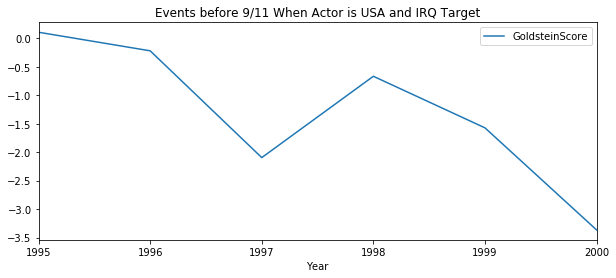

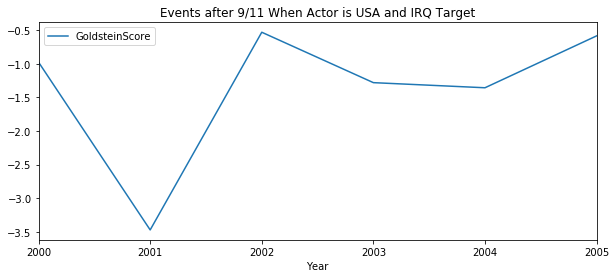

In [54]:
#Iraq

USAsource       = before9_11[before9_11['SourceActorEntity'] == 'USA']
USAsource_after = after9_11[after9_11['SourceActorEntity'] == 'USA']

USAsourceIRQtarget       = USAsource[USAsource['TargetActorEntity'] == 'IRQ']
USAsourceIRQtarget_after = USAsource_after[USAsource_after['TargetActorEntity'] == 'IRQ']

USAsourceIRQtarget['Year']       = pd.DatetimeIndex(USAsourceIRQtarget['Date']).year
USAsourceIRQtarget_after['Year'] = pd.DatetimeIndex(USAsourceIRQtarget_after['Date']).year

USAsourceIRQtargetMeanGSperYear       = USAsourceIRQtarget.groupby(['Year']).agg({'GoldsteinScore':'mean'}).reset_index()
USAsourceIRQtargetMeanGSperYear_after = USAsourceIRQtarget_after.groupby(['Year']).agg({'GoldsteinScore':'mean'}).reset_index()

USAsourceIRQtargetMeanGSperYear.plot(kind='line',x='Year',y='GoldsteinScore',figsize=(10,4))
plt.title('Events before 9/11 When Actor is USA and IRQ Target');

USAsourceIRQtargetMeanGSperYear_after.plot(kind='line',x='Year',y='GoldsteinScore',figsize=(10,4))
plt.title('Events after 9/11 When Actor is USA and IRQ Target');

# Meanwhile in Shire, where the Hobbits live

C:\Users\Cagdas\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:4011: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


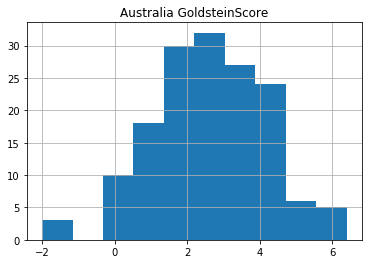

In [55]:
#Australia 
AUSsource = data[data['SourceActorEntity'] == 'AUS']
AUSsource.groupby(['TargetActorEntity']).GoldsteinScore.apply(np.median).hist()
plt.title("Australia GoldsteinScore");

We will focus on NATO countries plus Russia, Syria, Iraq, Iran, Israel

In [57]:
url = 'https://en.wikipedia.org/wiki/Member_states_of_NATO'
html = wp.page("Member_states_of_NATO").html().encode("UTF-8")
NATOdf = pd.read_html(html, header =0)[2]
NATOdf.head()

,Country,Population(2016 est.),"GDP (nominal)(2015, US$ millions)","Military expenditures(2015, US$ millions)","Military expenditures(2016, % of GDP)[20]","Defence expenditures,(2014, US$ per capita)",Deployable military(2016)[20]
0,Albania,3038594,11543,155.0,1.21,42.2,7000
1,Belgium,11409077,454687,4953.0,0.85,468.0,29000
2,Bulgaria,7144653,48957,797.0,1.35,116.0,31000
3,Canada,35362905,1552386,17210.0,0.99,492.0,65000
4,Croatia,4313707,48850,904.0,1.23,204.0,15000


we need a new column with country codes like USA, RUS

In [58]:
pycountry.countries.get(name='Albania')

Country(alpha_2='AL', alpha_3='ALB', name='Albania', numeric='008', official_name='Republic of Albania')

In [59]:
def func(s):
    try:
        c = pycountry.countries.get(name=s)
        return(c.alpha_3)       
    except:
        return(22)

In [60]:
NATOdf['Code'] = NATOdf['Country'].apply(func)

In [61]:
# is there any Null value?
count_nan = len(NATOdf) - NATOdf.count()
count_nan

Country                                        0
Population(2016 est.)                          0
GDP (nominal)(2015, US$ millions)              0
Military expenditures(2015, US$ millions)      0
Military expenditures(2016, % of GDP)[20]      0
Defence expenditures,(2014, US$ per capita)    0
Deployable military(2016)[20]                  0
Code                                           0
dtype: int64

In [62]:
NATOdf.set_value(5, 'Code', 'CZE')

,Country,Population(2016 est.),"GDP (nominal)(2015, US$ millions)","Military expenditures(2015, US$ millions)","Military expenditures(2016, % of GDP)[20]","Defence expenditures,(2014, US$ per capita)",Deployable military(2016)[20],Code
0,Albania,3038594,11543,155.0,1.21,42.2,7000,ALB
1,Belgium,11409077,454687,4953.0,0.85,468.0,29000,BEL
2,Bulgaria,7144653,48957,797.0,1.35,116.0,31000,BGR
3,Canada,35362905,1552386,17210.0,0.99,492.0,65000,CAN
4,Croatia,4313707,48850,904.0,1.23,204.0,15000,HRV
5,Czech Republic,10644842,181858,2099.0,1.04,189.0,22000,CZE
6,Denmark,5593785,294951,4130.0,1.14,796.0,16000,DNK
7,Estonia,1258545,22704,546.0,2.16,392.0,6000,EST
8,France,66836154,2421560,49747.0,1.78,964.0,"207,000b",FRA
9,Germany,80722792,3413483,47046.0,1.19,562.0,180000,DEU


In [63]:
NATOdf = NATOdf.drop(NATOdf.index[[29]])

In [65]:
NATOdf["Military expenditures(2015, US$ millions)"].describe()

count        29.000000
mean      30826.258621
std      109777.352158
min           4.500000
25%         566.000000
50%        4130.000000
75%       16929.000000
max      595472.000000
Name: Military expenditures(2015, US$ millions), dtype: float64

In [66]:
NATOdf = NATOdf[NATOdf["Military expenditures(2015, US$ millions)"] > 4130 ]

In [67]:
NATOdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 1 to 28
Data columns (total 8 columns):
Country                                        14 non-null object
Population(2016 est.)                          14 non-null int64
GDP (nominal)(2015, US$ millions)              14 non-null int64
Military expenditures(2015, US$ millions)      14 non-null float64
Military expenditures(2016, % of GDP)[20]      14 non-null object
Defence expenditures,(2014, US$ per capita)    14 non-null float64
Deployable military(2016)[20]                  14 non-null object
Code                                           14 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 1008.0+ bytes


We have 14 NATO Countries who spends more than the median value on Weapons. Lets add 6 more interesting countries to this list

In [68]:
Ctr_list = NATOdf.Code.append(pd.Series(['RUS','UKR','SYR','IRQ','IRN','ISR']), ignore_index=True)

In [69]:
Ctr_list.values
        
def funct(s):
    for i in Ctr_list.values:
        if s == i:
            return i
        else:
            pass

In [70]:
data['Network'] = data['SourceActorEntity'].apply(funct)
data['NetworkTarget'] = data['TargetActorEntity'].apply(funct)

In [71]:
data.head()

,index,EventID,Date,Year,Month,Day,SourceActorFull,SourceActorEntity,SourceActorRole,SourceActorAttribute,...,Lat,Lon,LocationName,StateName,CountryCode,SentenceID,URLs,NewsSources,Network,NetworkTarget
3,3,SWB2740432,2009-10-11,2009.0,10.0,11.0,---MED,NaN,MED,NaN,...,39.76000,-98.50000,United States,NaN,USA,113261656,SWBpre01012007_V1,bbc,None,None
5,5,SWB0116946,2009-10-18,2009.0,10.0,18.0,---MIL,NaN,MIL,NaN,...,NaN,NaN,NaN,NaN,NaN,113261666,SWBpre01012007_V1,bbc,None,IRN
7,7,SWB1724748,2009-09-28,2009.0,9.0,28.0,MEAREB,NaN,REB,NaN,...,34.64010,50.87640,Qom,Qom,IRN,113261670,SWBpre01012007_V1,bbc,None,IRN
8,8,SWB1714910,2009-09-28,2009.0,9.0,28.0,IRN,IRN,NaN,NaN,...,34.64010,50.87640,Qom,Qom,IRN,113261670,SWBpre01012007_V1,bbc,IRN,IRN
9,9,SWB1678284,2009-09-28,2009.0,9.0,28.0,USA,USA,NaN,NaN,...,35.69439,51.42151,TehrÄn,OstÄn-e TehrÄn,IRN,113261670,SWBpre01012007_V1,bbc,USA,IRN


# Network big-NATO 14 + RUS, UKR', SYR, IRQ, IRN, ISR

Countries Are the Nodes and Events are Edges

In [72]:
data.columns

Index(['index', 'EventID', 'Date', 'Year', 'Month', 'Day', 'SourceActorFull',
       'SourceActorEntity', 'SourceActorRole', 'SourceActorAttribute',
       'TargetActorFull', 'TargetActorEntity', 'TargetActorRole',
       'TargetActorAttribute', 'EventCode', 'EventRootCode', 'PentaClass',
       'GoldsteinScore', 'Issues', 'Lat', 'Lon', 'LocationName', 'StateName',
       'CountryCode', 'SentenceID', 'URLs', 'NewsSources', 'Network',
       'NetworkTarget'],
      dtype='object')

In [73]:
dataNetwork = data.copy(deep=True)

In [74]:
dataNetwork.drop(['Network', 'NetworkTarget'], axis=1, inplace=True)

In [75]:
dataNetwork.head()

,index,EventID,Date,Year,Month,Day,SourceActorFull,SourceActorEntity,SourceActorRole,SourceActorAttribute,...,GoldsteinScore,Issues,Lat,Lon,LocationName,StateName,CountryCode,SentenceID,URLs,NewsSources
3,3,SWB2740432,2009-10-11,2009.0,10.0,11.0,---MED,NaN,MED,NaN,...,1.0,NaN,39.76000,-98.50000,United States,NaN,USA,113261656,SWBpre01012007_V1,bbc
5,5,SWB0116946,2009-10-18,2009.0,10.0,18.0,---MIL,NaN,MIL,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,113261666,SWBpre01012007_V1,bbc
7,7,SWB1724748,2009-09-28,2009.0,9.0,28.0,MEAREB,NaN,REB,NaN,...,0.0,NaN,34.64010,50.87640,Qom,Qom,IRN,113261670,SWBpre01012007_V1,bbc
8,8,SWB1714910,2009-09-28,2009.0,9.0,28.0,IRN,IRN,NaN,NaN,...,0.0,NaN,34.64010,50.87640,Qom,Qom,IRN,113261670,SWBpre01012007_V1,bbc
9,9,SWB1678284,2009-09-28,2009.0,9.0,28.0,USA,USA,NaN,NaN,...,3.4,NaN,35.69439,51.42151,TehrÄn,OstÄn-e TehrÄn,IRN,113261670,SWBpre01012007_V1,bbc


In [76]:
dataNetwork_2 = dataNetwork[pd.notnull(dataNetwork['SourceActorEntity'])]

In [77]:
dataNetwork_3 = dataNetwork_2[pd.notnull(dataNetwork_2['TargetActorEntity'])]

In [78]:
dataNetwork_3.head()

,index,EventID,Date,Year,Month,Day,SourceActorFull,SourceActorEntity,SourceActorRole,SourceActorAttribute,...,GoldsteinScore,Issues,Lat,Lon,LocationName,StateName,CountryCode,SentenceID,URLs,NewsSources
8,8,SWB1714910,2009-09-28,2009.0,9.0,28.0,IRN,IRN,NaN,NaN,...,0.0,NaN,34.64010,50.87640,Qom,Qom,IRN,113261670,SWBpre01012007_V1,bbc
9,9,SWB1678284,2009-09-28,2009.0,9.0,28.0,USA,USA,NaN,NaN,...,3.4,NaN,35.69439,51.42151,TehrÄn,OstÄn-e TehrÄn,IRN,113261670,SWBpre01012007_V1,bbc
12,12,SWB1691966,2009-10-19,2009.0,10.0,19.0,USAGOV,USA,GOV,NaN,...,0.0,NaN,32.00000,53.00000,Islamic Republic of Iran,NaN,IRN,113261678,SWBpre01012007_V1,bbc
15,15,SWB1680485,2009-10-27,2009.0,10.0,27.0,TUR,TUR,NaN,NaN,...,4.0,NaN,35.69439,51.42151,TehrÄn,NaN,IRN,113261691,SWBpre01012007_V1,bbc
16,16,SWB1756265,2009-10-27,2009.0,10.0,27.0,TURGOV,TUR,GOV,NaN,...,1.9,NaN,35.69439,51.42151,TehrÄn,OstÄn-e TehrÄn,IRN,113261691,SWBpre01012007_V1,bbc


In [80]:
count_nan = len(dataNetwork_3) - dataNetwork_3.count()
count_nan

index                         0
EventID                       0
Date                          0
Year                          0
Month                         0
Day                           0
SourceActorFull               0
SourceActorEntity             0
SourceActorRole          652286
SourceActorAttribute    1008660
TargetActorFull               0
TargetActorEntity             0
TargetActorRole          855305
TargetActorAttribute    1043992
EventCode                     0
EventRootCode                 0
PentaClass                   44
GoldsteinScore               44
Issues                  1043630
Lat                      292734
Lon                      292734
LocationName             292734
StateName                912227
CountryCode              292734
SentenceID                    0
URLs                          0
NewsSources                   0
dtype: int64

In [81]:
# rank the nodes by degree. write down the most important countries

In [82]:
G = nx.from_pandas_dataframe(dataNetwork_3, 'SourceActorEntity', 'TargetActorEntity')

In [83]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 211
Number of edges: 11018
Average degree: 104.4360


In [84]:
pr = nx.pagerank(G)
pagerank = pd.Series(pr)

degrees = G.degree()
degrees = pd.Series(degrees)

In [85]:
pagerank.sort_values(ascending=False)[:10]

USA    0.009311
CHN    0.009227
IGO    0.009079
GBR    0.008693
FRA    0.008541
JPN    0.008531
IND    0.008230
NGO    0.008045
RUS    0.008027
DEU    0.007842
dtype: float64

In [86]:
degrees.sort_values(ascending=False)[:10]

CHN    207
IGO    206
USA    205
GBR    198
FRA    197
JPN    195
NGO    186
RUS    185
DEU    182
IND    178
dtype: int64

In [87]:
df_pr_deg = pd.DataFrame(pagerank, columns=['pagerank'])
df_pr_deg['degrees'] = degrees

df_pr_deg.sort_values(by = 'degrees', ascending=False)[:10]

,pagerank,degrees
CHN,0.009227,207
IGO,0.009079,206
USA,0.009311,205
GBR,0.008693,198
FRA,0.008541,197
JPN,0.008531,195
NGO,0.008045,186
RUS,0.008027,185
DEU,0.007842,182
IND,0.008230,178


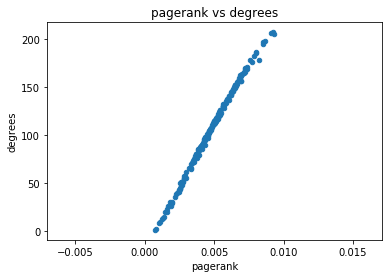

In [88]:
df_pr_deg.plot.scatter(x='pagerank', y='degrees', title = 'pagerank vs degrees');

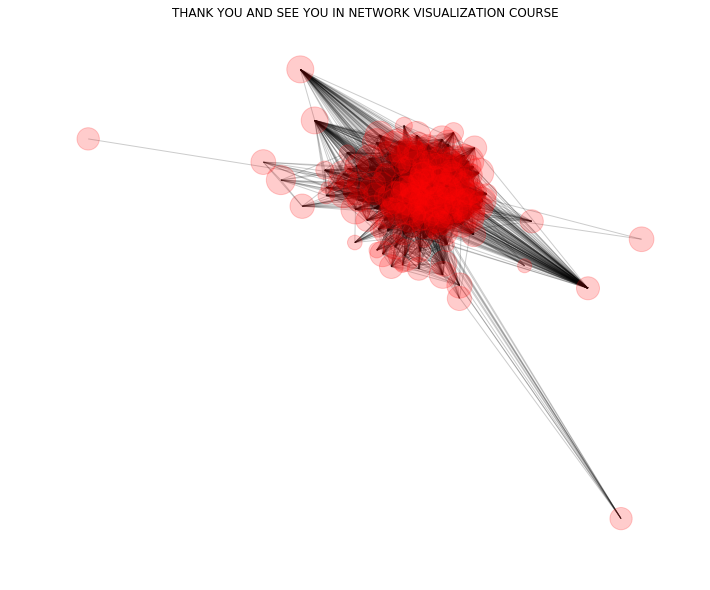

In [132]:
plt.figure(figsize=(12,10))
plt.axis('off')
nx.draw_networkx(G, with_labels=False, alpha=0.2, node_size=degrees*5)
plt.title("THANK YOU AND SEE YOU IN NETWORK VISUALIZATION COURSE")
plt.show()